In [6]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import random
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [7]:
df = pd.read_csv("worldcities.csv")
df = df[['city', 'lat', 'lng']]
df.head()

,city,lat,lng
0,Tokyo,35.6839,139.7744
1,Jakarta,-6.2146,106.8451
2,Delhi,28.6667,77.2167
3,Manila,14.6000,120.9833
4,São Paulo,-23.5504,-46.6339


In [8]:
# code from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


In [9]:
def kmeans(k):
    pts = [np.array(pt) for pt in zip(df['lng'], df['lat'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, [] # arbitrary but different
    while cluster_ids != old_cluster_ids: #### change to do while?
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = -1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                dist = np.linalg.norm(pt - center)
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
#     df['cluster'] = df['cluster'].astype('category')
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                        for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    ax.coastlines()
    for i in range (k):
        ax.plot(df[df['cluster'] == i]['lng'], df[df['cluster'] == i]['lat'], "o", transform=ccrs.PlateCarree(),markersize=2)


D:\Anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


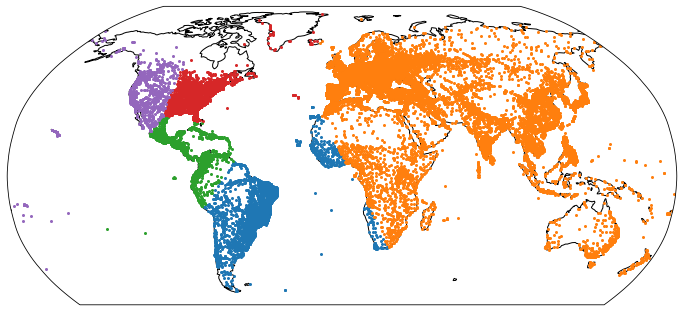

In [10]:
kmeans(5)

D:\Anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


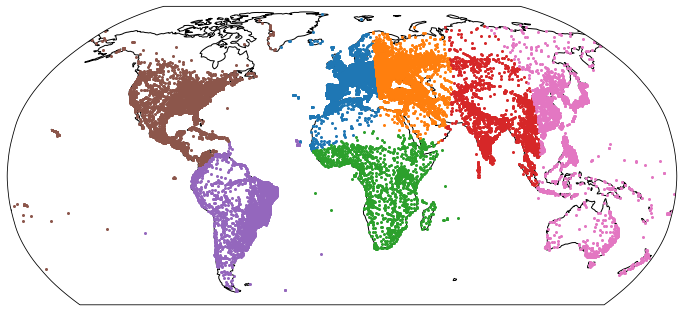

In [11]:
kmeans(7)

D:\Anaconda\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
D:\Anaconda\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


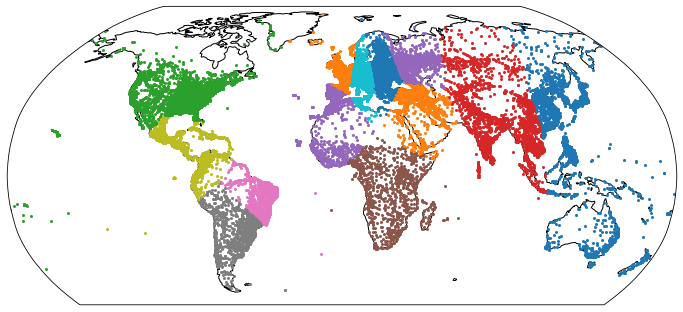

In [12]:
kmeans(15)